# Analyze EEG data

This notebook will help you prepare the figures for your EEG lab report.

To run this notebook:

1. <mark>Export two separate **LabChart Text File (.txt)** of 30 seconds of data for <i>both</i> eyes open and closed. </mark>
2. Upload the file to Colab.
3. Change the filename below to match the name of your file.

In [55]:
import glob

control_filenames = glob.glob('control/*.txt')
pleasant_filenames = glob.glob('pleasant/*.txt')
unsettling_filenames = glob.glob('unsettling/*.txt')

control_filenames

['control/EEG_Trial1_EyesOpen.txt']

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

sampling_freq = 400

def generate_psd(filenames):
  control_psd = np.zeros((801,len(filenames)))

  for i,file in enumerate(filenames):

    print(file)

    # Define column names
    columns = ['time', 'recording']

    # Use numpy genfromtxt to import both files
    closed_data = np.genfromtxt(file, dtype=float, usecols=(0,1), skip_header=6, delimiter='\t', names=columns, encoding = 'unicode_escape')

    # Define a function to remove nan values
    def nan_helper(y):
        return np.isnan(y), lambda z: z.nonzero()[0]

    # Save recording & timestamps as variables
    closed_timestamps = closed_data['time']
    closed_recording = closed_data['recording']
    nans, x = nan_helper(closed_recording)
    closed_recording[nans]= np.interp(x(nans), x(~nans), closed_recording[~nans])


    # Define sliding window length (4 seconds, which will give us 2 full cycles at 0.5 Hz)
    win = 4 * sampling_freq
    freqs, psd = signal.welch(closed_recording, sampling_freq, nperseg=win)

    control_psd[:,i] = psd

    average_psd = np.mean(control_psd,axis=1)

  return average_psd, control_psd, freqs

def plot_psd(average_psd,control_psd,freqs):
  # Plot the power spectrum
  plt.figure(figsize=(8, 6))
  plt.plot(freqs,average_psd)

  # Calculate standard error
  std_err = np.std(control_psd, axis=1) / np.sqrt(control_psd.shape[1])

  #Plot standard error
  plt.fill_between(freqs, psd - std_err, psd + std_err, alpha=0.3)

  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Power spectral density (pV^2 / Hz)') # Check that these units make sense!
  plt.xlim([0,75]) # Change x limit

  plt.title("Welch's PSD")
  plt.show()


In [71]:
average_psd, control_psd, freqs = generate_psd(control_filenames) # change the names of these
average_psd,control_psd, freqs = generate_psd(pleasant_filenames)
average_psd, control_psd, freqs = generate_psd(unsettling_filenames)

pleasant/EEG_Trial1_EyesOpen.txt
pleasant/EEG_Trial1_EyesClosed.txt


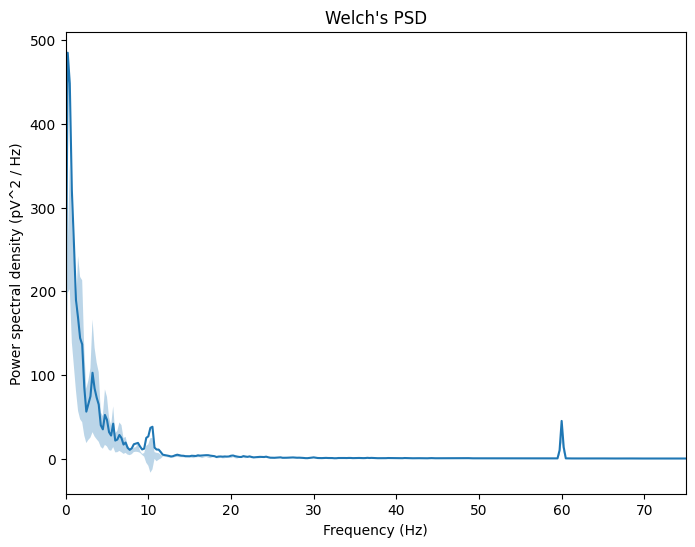

In [76]:
plot_psd(average_psd,control_psd,freqs)

In [ ]:
plot_psd(average_psd,control_psd,freqs)

In [ ]:
plot_psd(average_psd,control_psd,freqs)

## Generate & plot spectrogram
As a final step, we can plot a **spectrogram** of our signal. This is a common way to visualize EEG signals. The spectrogram results from doing the FFT on the snippet of the signal that falls into a “window,” plotting the frequency content in the window, then moving the window in time and plotting the frequency content again (and again) until the window has moved across the entire signal.

In [ ]:
vmax = 20 # change the max value on your spectogram -- you may need to adjust this

wind = np.hanning(1024) # Create a "hanning" window with a given binning window size

# Create the spectrogram and plot
fig = plt.figure()

# Change closed to open below to generate for open
f, tt, Sxx = signal.spectrogram(closed_recording,sampling_freq,wind,len(wind),len(wind)-1)

# You can change cmap & vmax if you want
plt.pcolormesh(tt,f,Sxx,cmap='viridis',vmax=vmax)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
# plt.ylim([0,75]) # set the ylimit
cbar = plt.colorbar()
cbar.ax.set_ylabel('Power ($V^2$)')
plt.show()